In [1]:
!pip install deepface

     |████████████████████████████████| 65 kB 1.7 MB/s 
     |████████████████████████████████| 2.3 MB 14.1 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
     |████████████████████████████████| 60.5 MB 132 kB/s 
     |████████████████████████████████| 462 kB 54.0 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=73098f418072727631ecb876f046ee0ba59e3ebcaf8adb0b57195071266d94a5
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


In [4]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from os import listdir
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [5]:
database ={}
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [6]:
model = ['VGG-Face', 'OpenFace', 'Facenet', 'FbDeepFace']
i = 2

In [7]:
def mencocokan_wajah_cosine_similarity(img_path):
  index = 0
  prediksi = 0
  jarak = 0
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], 
                                     align=False,
                                     enforce_detection = True))
  for key, value in database.items() :
    pic1 = value
    distance_vector = np.square(pic1 - pic2)
    distance = cosine_similarity(pic1.reshape(1,-1),pic2.reshape(1,-1))
    hasil.append([key,distance])
    if(distance > jarak ):
        prediksi = index
        jarak = distance
  index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Similarity'])
  df.sort_values(by='Similarity', ascending=False, inplace=True)
  
  df = menampilkan_hasil(img_path, df, 'Similarity')

  return df

In [8]:
def mencocokan_wajah_euclidean_distance(img_path):
  index = 0
  prediksi = 0
  jarak = 10
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], align=False,
                                     enforce_detection = True))
  for key, value in database.items() :
    pic1 = value
    distance_vector = np.square(pic1 - pic2)
    distance = np.sqrt(distance_vector.sum())
    hasil.append([key,distance])
    if(distance < jarak ):
        prediksi = index
        jarak = distance
    index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Distance'])
  df.sort_values(by='Distance', ascending=True, inplace=True)
  
  df = menampilkan_hasil(img_path, df, 'Distance')
  return df

In [9]:
def menampilkan_hasil(img_path, df, field):

  fig = plt.figure(figsize=(10,20))
  fig.add_subplot(3,2,1)
  img2 = plt.imread(img_path)
  plt.title("Asli")
  plt.imshow(img2)
  plt.axis('off')
  z = 2
  for index, row in df.head().iterrows():
      fig.add_subplot(3,2,z)
      img2 = plt.imread('AnggotaKelas/'+row['Photo'])
      plt.title(f"{field}: {row[field]}")
      plt.imshow(img2)
      plt.axis('off')
      z = z + 1

  plt.show()
  return df

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:02<00:00, 35.9MB/s]


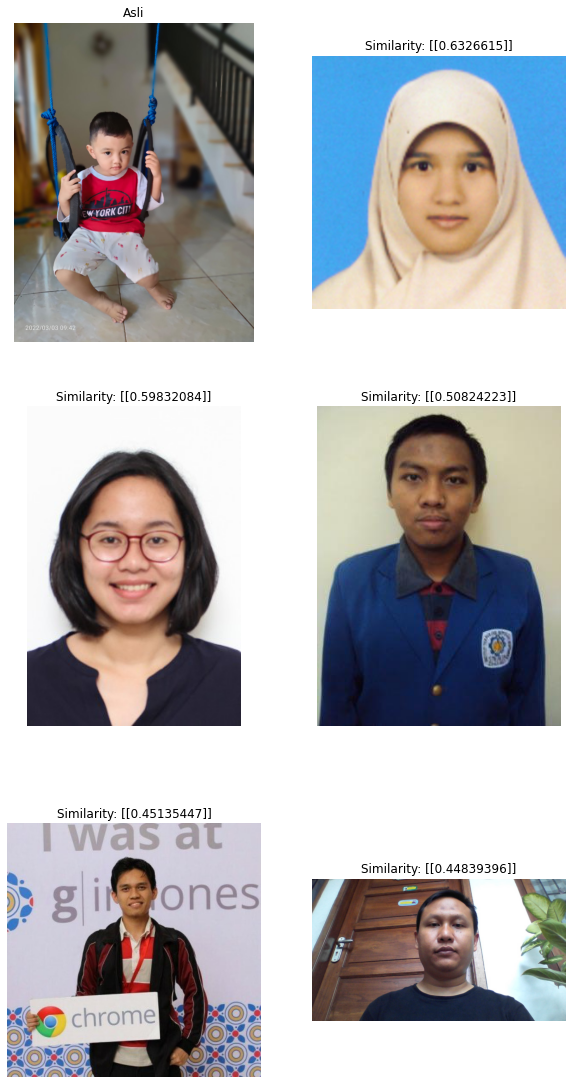

In [10]:
img_path = 'NonAnggotaKelas/Arkhana 001.jpeg'
img = cv2.imread(img_path)
df = mencocokan_wajah_cosine_similarity(img_path)

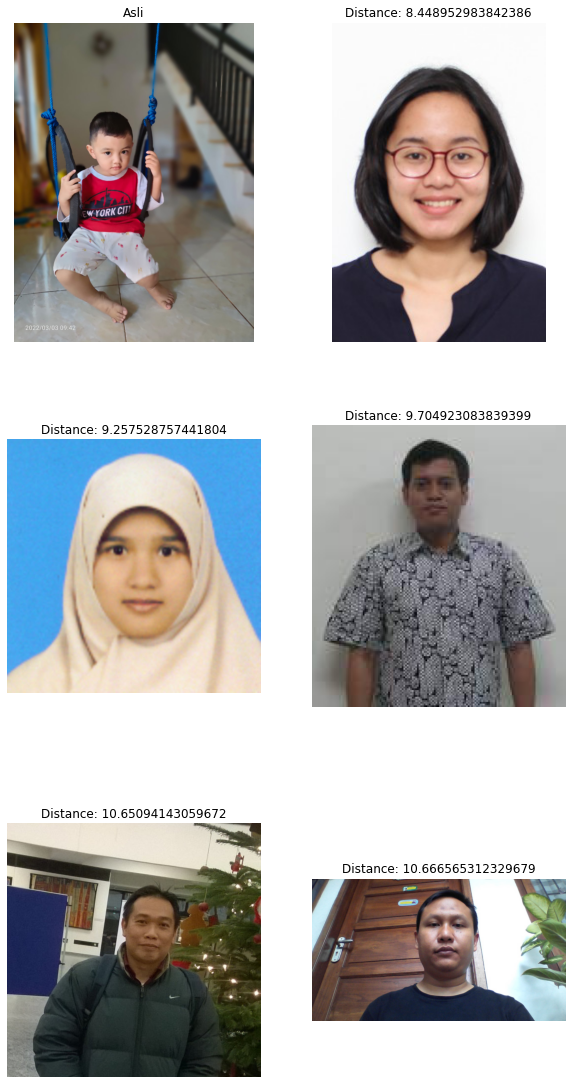

In [11]:
img_path = 'NonAnggotaKelas/Arkhana 001.jpeg'
img = cv2.imread(img_path)
df = mencocokan_wajah_euclidean_distance(img_path)